In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from functools import reduce

In [3]:
house_data = pd.read_csv('csv files/house_data.csv')
condo_data = pd.read_csv('csv files/condo_data.csv')
apartment_data = pd.read_csv('csv files/apartment_data.csv')

# Functions Used

This section includes functions created for the general visualization of different factors of the data

In [4]:
# Creates a histogram depending on the data given, saves the images in the image folder with 300 DPI
# Data need to be given are the data itself, the xlabel, ylabel, title, number of bins, and the file name
def createHistogram(data, plotDetails, fileName):
    plt.xlabel(plotDetails['xlabel'])
    plt.ylabel(plotDetails['ylabel'])
    plt.title(plotDetails['title'])
    plt.hist(data, bins=plotDetails['bins']);
    plt.savefig(f'images/{fileName}',dpi = 300,bbox_inches='tight')
    plt.show()

# Visualize Price

In this section, price frequency would be visualized in the different listing categories.

## House Data - Buying

A histogram would be created in this section to see the different pricing of each of the house listings that are up for sale

In [5]:
house_data.sort_values(by=['price'], ascending=False).head(1)

link  \
11737  https://www.lamudi.com.ph/ttttggfc-bvnllmb-vjn...   

                                       title         price  \
11737  ttttggfc bvnllmb vjnlnnvchj vjjkknnvv  5.989994e+12   

                       location propertyType offerType  Bedrooms  Bathrooms  \
11737  Ilustre, President Roxas        house      rent        10          9   

       Floor area (m)  Land Size (m)  ...  Smoke detector  \
11737     398855998.0    888088669.0  ...           False   

       Split-system heating  Badminton court  Helipad  Sports facilities  \
11737                 False            False    False              False   

       Tennis court Volleyball Court  Monthly Payment  Yearly Payment  \
11737         False            False            False           False   

       Daily Payment  
11737           True  

[1 rows x 76 columns]

It appears that a spam listing has made it through the data cleaning process, this particular listing would be removed

In [6]:
house_data.drop(house_data.index[11737], inplace = True)

In [7]:
# Sort house_data by their price
house_data.sort_values(by=['price'], ascending=False, inplace=True)

In [8]:
# Get only prices of house_data that are buying
housePrices = house_data.loc[house_data['offerType'] == 'buy']['price'].tolist()

# Convert housePrices into millions of pesos
housePrices = [i/1000000 for i in housePrices]

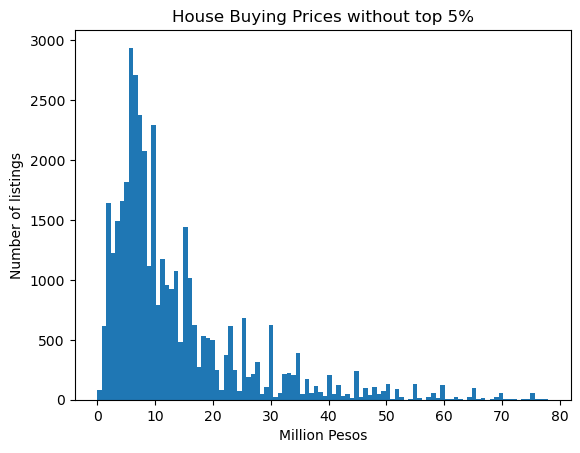

In [9]:
# Visualize without the top 5% (Outliers)
plotDetails = {'xlabel': 'Million Pesos',
              'ylabel': 'Number of listings', 'bins': 100,
              'title': 'House Buying Prices without top 5%'}

createHistogram(housePrices[int(len(housePrices)*0.05):], plotDetails, 'house_buy_price')

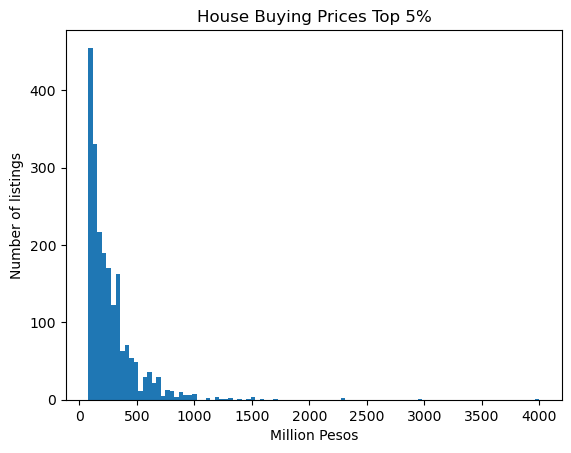

In [10]:
# Visualize just the top 5% (Outliers)
plotDetails = {'xlabel': 'Million Pesos',
              'ylabel': 'Number of listings', 'bins': 100,
              'title': 'House Buying Prices Top 5%'}
createHistogram(housePrices[:int(len(housePrices)*0.05)], plotDetails, 'house_buy_price_outlier')

## House Data - Rent

In [11]:
# Get only prices of house_data that are buying
housePrices = house_data.loc[house_data['offerType'] == 'rent']['price'].tolist()

# Convert housePrices into thousand of pesos
housePrices = [i/1000 for i in housePrices]

In [12]:
len(housePrices)

5577

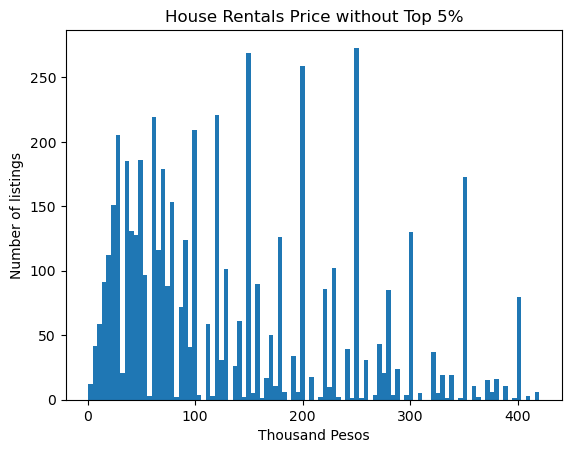

In [13]:
# Visualize without the top 5% (Outliers)
plotDetails = {'xlabel': 'Thousand Pesos',
              'ylabel': 'Number of listings', 'bins': 100,
              'title': 'House Rentals Price without Top 5%'}
createHistogram(housePrices[int(len(housePrices)*0.05):], plotDetails, 'house_rent_price')

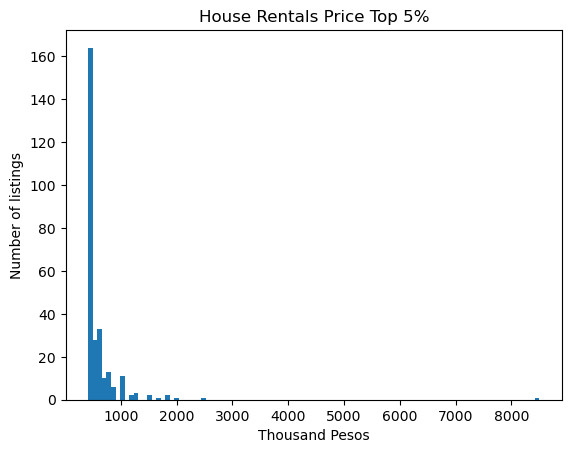

In [14]:
# Visualize just the top 5% (Outliers)
plotDetails = {'xlabel': 'Thousand Pesos',
              'ylabel': 'Number of listings', 'bins': 100,
              'title': 'House Rentals Price Top 5%'}
createHistogram(housePrices[:int(len(housePrices)*0.05)], plotDetails, 'house_rent_price_outlier')

## Condominium Data - Buying

In [15]:
# Sort condominium data by their price
condo_data.sort_values(by=['price'], ascending=False, inplace=True)

In [16]:
# Get only prices of condominium data that are buying
condoPrices = condo_data.loc[condo_data['offerType'] == 'buy']['price'].tolist()


# Convert condoPrices into millions of pesos
condoPrices = [i/1000000 for i in condoPrices]

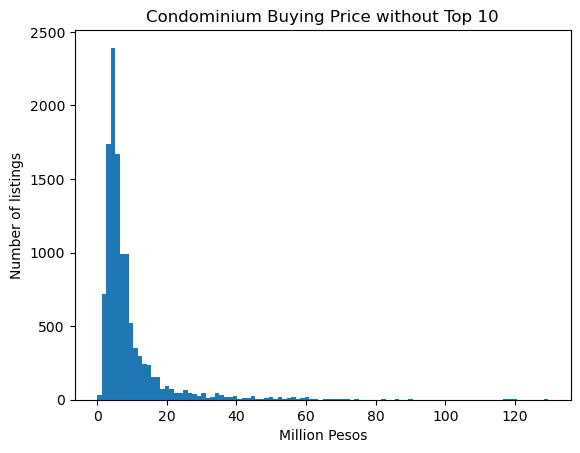

In [17]:
# Visualize without the top 10 (Outliers)
plotDetails = {'xlabel': 'Million Pesos',
              'ylabel': 'Number of listings', 'bins': 100,
              'title': 'Condominium Buying Price without Top 10'}
createHistogram(condoPrices[10:], plotDetails, 'condo_buy_price')

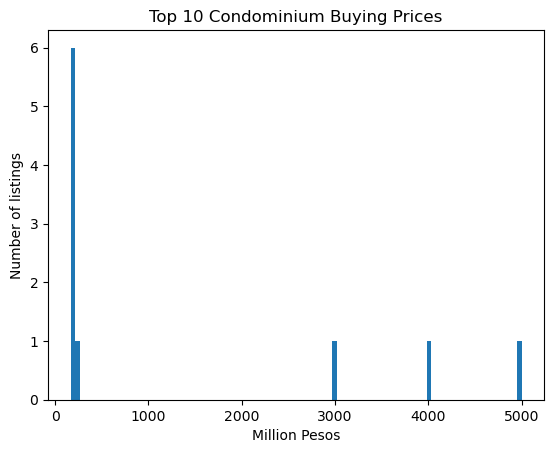

In [18]:
# Visualize just the top 10 (Outliers)
plotDetails = {'xlabel': 'Million Pesos',
              'ylabel': 'Number of listings', 'bins': 100,
              'title': 'Top 10 Condominium Buying Prices'}
createHistogram(condoPrices[:10], plotDetails, 'condo_buy_price_outlier')

## Condominium Data - Renting

In [19]:
# Get only prices of condominium data that are renting
condoPrices = condo_data.loc[condo_data['offerType'] == 'rent']['price'].tolist()


# Convert condoPrices into millions of pesos
condoPrices = [i/1000 for i in condoPrices]

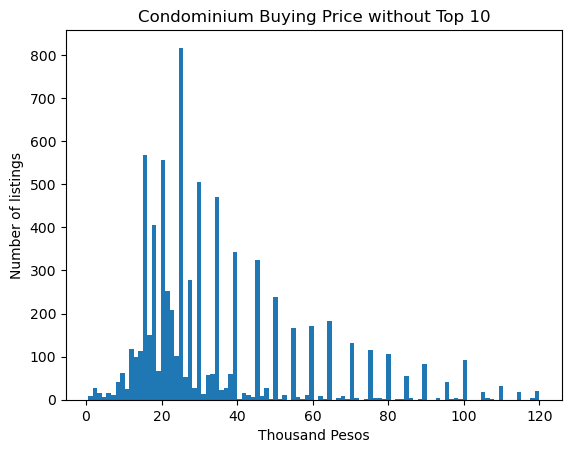

In [20]:
# Visualize without the top 5% (Outliers)
plotDetails = {'xlabel': 'Thousand Pesos',
              'ylabel': 'Number of listings', 'bins': 100,
              'title': 'Condominium Buying Price without Top 10'}
createHistogram(condoPrices[int(len(condoPrices)*0.05):], plotDetails, 'condo_rent_price')

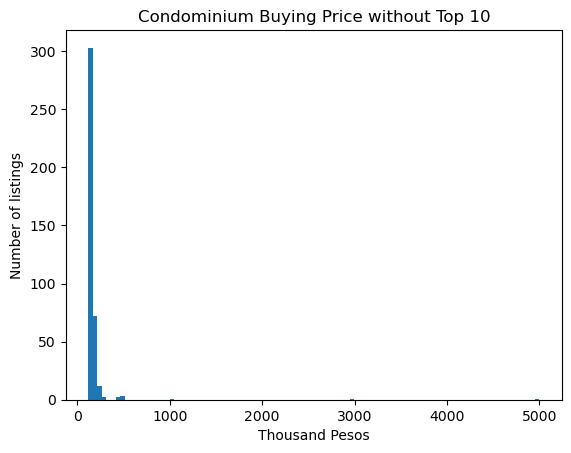

In [21]:
# Visualize just the top 5% (Outliers)
plotDetails = {'xlabel': 'Thousand Pesos',
              'ylabel': 'Number of listings', 'bins': 100,
              'title': 'Condominium Buying Price without Top 10'}
createHistogram(condoPrices[:int(len(condoPrices)*0.05)], plotDetails, 'condo_rent_price_outliers')

## Apartment Data - Buying

In [22]:
# Sort apartment data by their price
apartment_data.sort_values(by=['price'], ascending=False, inplace=True)

In [23]:
# Upon inspection, the top listing in the apartment data is a test-case for the developers where the title
# is simply "test test test test", this listing would then be removed
apartment_data.drop(apartment_data.loc[apartment_data['link'] == 'https://www.lamudi.com.ph/test-test-test-test-5.html'].index, inplace = True)

# Get only prices of apartment data that are buying
apartPrices = apartment_data.loc[apartment_data['offerType'] == 'buy']['price'].tolist()


# Convert apartPrices into millions of pesos
apartPrices = [i/1000000 for i in apartPrices]

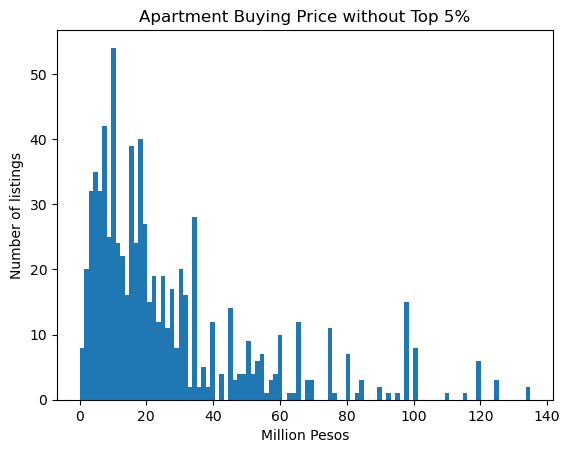

In [24]:
# Visualize without the top 5% (Outliers)
plotDetails = {'xlabel': 'Million Pesos',
              'ylabel': 'Number of listings', 'bins': 100,
              'title': 'Apartment Buying Price without Top 5%'}
createHistogram(apartPrices[int(len(apartPrices)*0.05):], plotDetails, 'apart_buy_price')

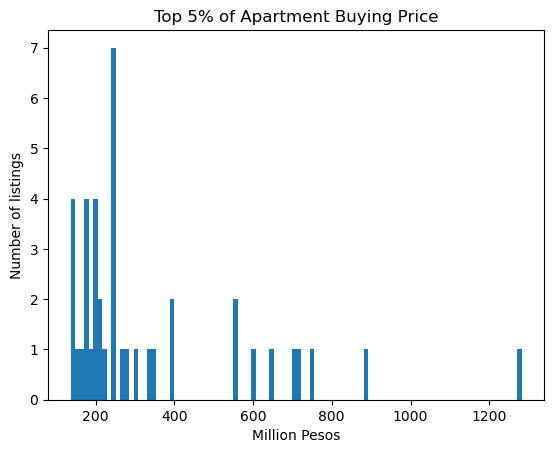

In [25]:
# Visualize just the top 5% (Outliers)
plotDetails = {'xlabel': 'Million Pesos',
              'ylabel': 'Number of listings', 'bins': 100,
              'title': 'Top 5% of Apartment Buying Price'}
createHistogram(apartPrices[:int(len(apartPrices)*0.05)], plotDetails, 'apart_buy_price_outlier')

## Apartment Data - Renting

In [26]:
# Get only prices of apartment data that are buying
apartPrices = apartment_data.loc[apartment_data['offerType'] == 'rent']['price'].tolist()


# Convert apartPrices into millions of pesos
apartPrices = [i/1000 for i in apartPrices]

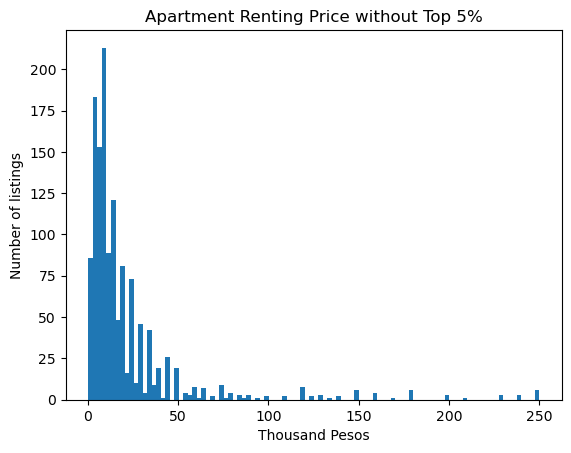

In [27]:
# Visualize without the top 5% (Outliers)
plotDetails = {'xlabel': 'Thousand Pesos',
              'ylabel': 'Number of listings', 'bins': 100,
              'title': 'Apartment Renting Price without Top 5%'}
createHistogram(apartPrices[int(len(apartPrices)*0.05):], plotDetails, 'apart_rent_price')

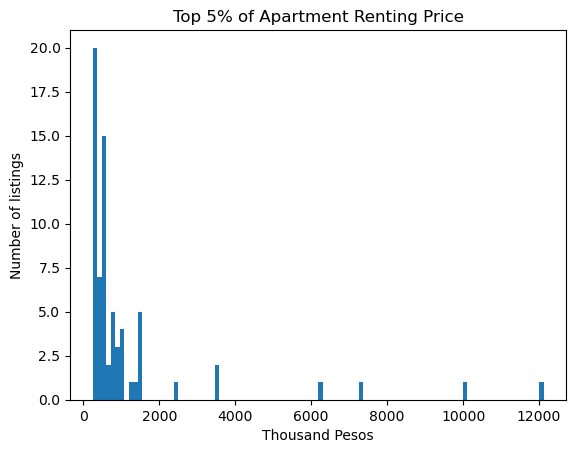

In [28]:
# Visualize without the top 5% (Outliers)
plotDetails = {'xlabel': 'Thousand Pesos',
              'ylabel': 'Number of listings', 'bins': 100,
              'title': 'Top 5% of Apartment Renting Price'}
createHistogram(apartPrices[:int(len(apartPrices)*0.05)], plotDetails, 'apart_rent_price_outlier')

# Map Data

The following geospatial data that would be used in the data visualization came from [godalida's github](https://github.com/godalida/geopandas-philippines). The geospatial data would be used to visualize different aspects of the real estate data which can include the different pricings per region/per city, number of listings per region/per city, and others

In [72]:
province = geopandas.read_file('geopandas-philippines/CashaCart.shp')
region_city_data = pd.read_csv('csv files/CityData.csv')

<AxesSubplot:>

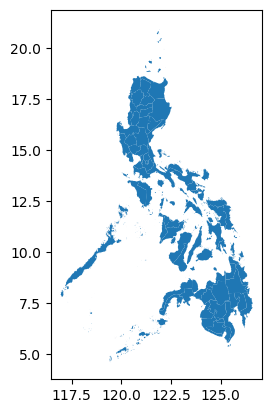

In [73]:
province.plot()

In total, there are 81 unique provinces in the dataset *province*, with this, we would be looking if the locations in house, condo, and apartment data coincides with the province dataset and see if there are any missing location

## Location Preprocessing - Adding Region to Listings

The locations in the dataset is an indication of either the city that the listing is located in or the region that they are located in. With this, we want to further process the location of the listings so that we can the specific region that the listing is located in.

The csv file *CityData.csv* would be used to accomplish this task. However, as the city name of the location in the dataset is not similar yet to the format of the city names in the csv file, the city name should be transformed properly

In [88]:
province_list = province['Province'].tolist()

In [89]:
# Concatenate all locations into one list
all_location = set().union(house_data['location'].unique().tolist(), condo_data['location'].unique().tolist(),
                            apartment_data['location'].unique().tolist())

### Inspection of Location

In [90]:
# Get only the province or region of the location
no_location = []
region_equivalence = {}
city_list = region_city_data['cityName'].tolist()

# A list of strings/characters that are supposed to be ñ but was other foreign characters
invalid_characters = ['√±', '├▒', 'ãą', 'ûý', '√ī', 'ć±']


for location in all_location:
    currLoc = location.split(',')[-1].lstrip().lower().replace(' ', '-')
    for character in invalid_characters:
        currLoc = currLoc.replace(character, 'n')
        
    if currLoc not in city_list:
        no_location.append(currLoc)
    else:
        region_equivalence[currLoc] = region_city_data.loc[region_city_data['cityName'] == currLoc]['regionName'].iloc[0]

It appears that many of the location either indicates only the city where the listing is. With this information, the file CityData.csv in the csv files would be used to correlate the city to the province.


In [91]:
print(set(no_location))

{'biliran', 'bohol', 'casiguran', 'bulacan', 'cebu', 'tarlac', 'rosario', 'sorsogon', 'quezon', 'iloilo', 'rizal', 'san-isidro', 'romblon'}


These are the remaining locations that does not have a specific region attached to them at the current moment. With this, we'll be checking the cities associated to it with region_city_data more thoroughly

In [92]:
region_city_data.loc[region_city_data['cityName'].str.contains('|'.join(set(no_location)))]

regionName       cityName
20                   abra  san-isidro-ab
159              batangas      rosario-1
188               biliran      biliran-1
204                 bohol        bohol-1
233                 bohol   san-isidro-1
261              bukidnon       quezon-1
270               bulacan      bulacan-1
309               cagayan        rizal-1
406                cavite      rosario-2
428                  cebu         cebu-1
502       davao-del-norte   san-isidro-2
526        davao-oriental   san-isidro-3
650                iloilo       iloilo-1
696               isabela       quezon-2
703               isabela   san-isidro-4
715               kalinga        rizal-2
731              la-union      rosario-3
761                laguna        rizal-3
862                 leyte   san-isidro-5
891          metro-manila    quezon-city
1021       northern-samar      rosario-4
1023       northern-samar   san-isidro-6
1050          nueva-ecija       quezon-3
1051          nueva-ecija        rizal-4
1053          nueva-ecija   san-isidro-7
1072        nueva-vizcaya       quezon-4
1083   occidental-mindoro        rizal-5
1216               quezon       quezon-6
1258              romblon      romblon-1
1307             sorsogon    casiguran-1
1318             sorsogon     sorsogon-1
1377    surigao-del-norte   san-isidro-8
1400               tarlac       tarlac-1
1431  zamboanga-del-norte        rizal-7

The reason that these locations mostly had no corresponding cityName is because the cityName had a numbering in them to differentiate them from the locations with the same name

- bohol - bohol-1
- rizal - rizal
- quezon - quezon-6
- cebu - cebu-1
- biliran - biliran-1
- aurora - sorsogon
- tarlac - tarlac-1
- iloilo - iloilo-1
- bulacan - bulacan-1
- nueva-ecija - san-isidro
- batangas - rosario-1
- romblon - romblon-1

With this in-mind, these locations would be put in the dictionary manually and a new column would be created for all of the datasets to indicate the region they are located in

In [93]:
extra_loc = {'bohol': 'bohol', 'rizal': 'rizal', 'cebu': 'cebu', 'quezon': 'quezon', 'biliran': 'biliran',
            'casiguran': 'aurora', 'rosario': 'batangas', 'tarlac': 'tarlac', 'bulacan': 'bulacan',
            'iloilo': 'iloilo', 'sorsogon': 'aurora', 'san-isidro': 'nueva-ecija', 'romblon': 'romblon'}
region_equivalence.update(extra_loc)
del extra_loc

### Creation of Region Column in each of the dataset

In [94]:
# A function that returns the region that the location is located in
def changeLocation(currLoc):
    currLoc = currLoc.split(',')[-1].lstrip().lower().replace(' ', '-')
    for character in invalid_characters:
        currLoc = currLoc.replace(character, 'n')
    return region_equivalence[currLoc]

The following municipalities only specifies it to be in Cotabato. However, it needs to be specified on whether they are located on the north or south Cotabato. The code below specifies this need

In [95]:
region_equivalence['kidapawan'] = 'north-cotabato'
region_equivalence['koronadal'] = 'south-cotabato'
region_equivalence['general-santos'] = 'south-cotabato'

In [96]:
house_data['region'] = house_data['location'].apply(changeLocation)
apartment_data['region'] = apartment_data['location'].apply(changeLocation)
condo_data['region'] = condo_data['location'].apply(changeLocation)

### Creating new column in province to match dataset format

In [97]:
province['Province']

0                    Abra
1        Agusan del Norte
2          Agusan del Sur
3                   Aklan
4                   Albay
             ...         
76              Tawi-Tawi
77               Zambales
78    Zamboanga del Norte
79      Zamboanga del Sur
80      Zamboanga Sibugay
Name: Province, Length: 81, dtype: object

In [98]:
province['region'] = province['Province'].apply(lambda x: x.lower().replace(' ','-'))

The region 'metro_manila' is different in geopandas rows with it being 'metropolitan-manila' with that, this region for the province would be changed in the province dataset

In [99]:
province.loc[province['region'] == 'metropolitan-manila', 'region'] = 'metro-manila'

## Creating Summary of each dataset
Now that the region from the original dataset can be matched with the map's province dataset, a map visualization could be done for different aspects of the dataset.

### Creating of Functions
In this section, functions that would be used for the three datasets would be created. Particularly the functions included in this section would focus on:
- Visualizing the number of listings per region
- Visualizing the average prices per region
- Visualizing the average amenities/services per region

In [100]:
# Summarizes the dataset on their price, listings available, 
def summarize_dataset(df):
    # Summarize total list count, rent count, buy count, and their average prices.
    sum_df = pd.DataFrame()
    
    sum_df['total_count'] = df['region'].value_counts()

    sum_df['total_rent_count'] = df.loc[df['offerType'] == 'rent']['region'].value_counts()
    
    sum_df['rent_average_price'] = df.loc[df['offerType'] == 'rent'].groupby('region')['price'].mean()
    
    sum_df['total_buy_count'] = df.loc[df['offerType'] == 'buy']['region'].value_counts()
    
    sum_df['buy_average_price'] = df.loc[df['offerType'] == 'buy'].groupby('region')['price'].mean()
    
    sum_df['average_amenities_offered'] = 0
    for column in df.columns:
        ignore_column = ['Monthly Payment', 'Yearly Payment', 'Daily Payment']
        if df[column].dtype == 'bool' and column not in ignore_column:
            sum_df['average_amenities_offered'] += df.groupby('region')[column].sum()
    sum_df['average_amenities_offered'] /= sum_df['total_count']
    
    sum_df = sum_df.reset_index()
    sum_df = sum_df.rename(columns={'index': 'region'})
    return sum_df


# Creates images and saves them for the map visualization for each dataset
def create_images(df, main_name):
    map_stats = province.merge(df, on ='region', how='outer')
    map_stats = map_stats.fillna(0)
    all_images = ['total_count', 'total_rent_count', 'rent_average_price', 'total_buy_count',
                 'buy_average_price', 'average_amenities_offered']
    for stats in all_images:
        fig, ax = plt.subplots(1, figsize=(8,8))
        plt.axis('off')
        plt.title(f'{main_name}: {stats}')
        bar_info = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=df[stats].max()))
        bar_info._A = []
        cbar = fig.colorbar(bar_info)
        map_stats.plot(column=stats, cmap='Reds', linewidth=0.4, ax=ax, edgecolor=".4")
        plt.savefig(f'images/{main_name}_{stats}.jpg', dpi=300)

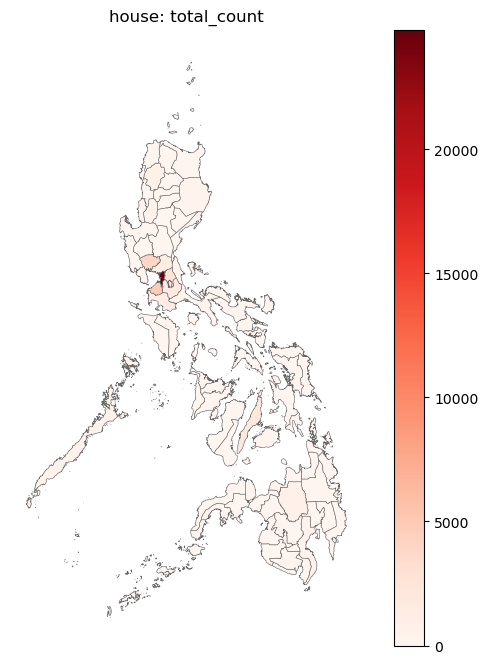

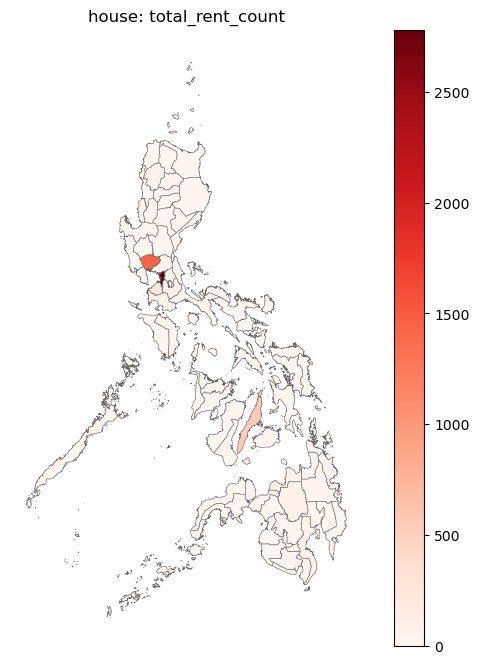

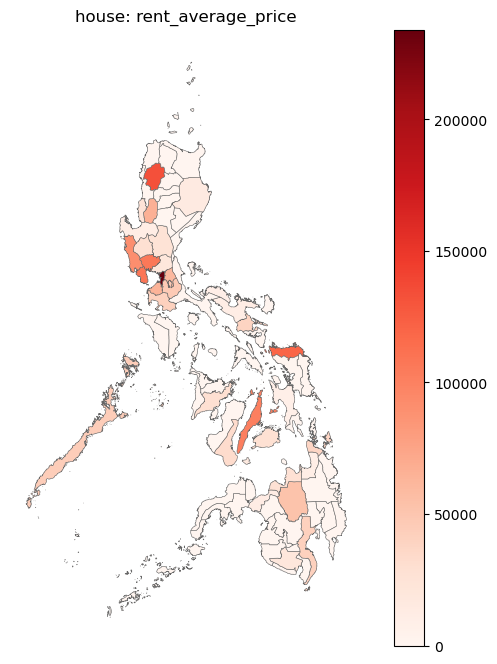

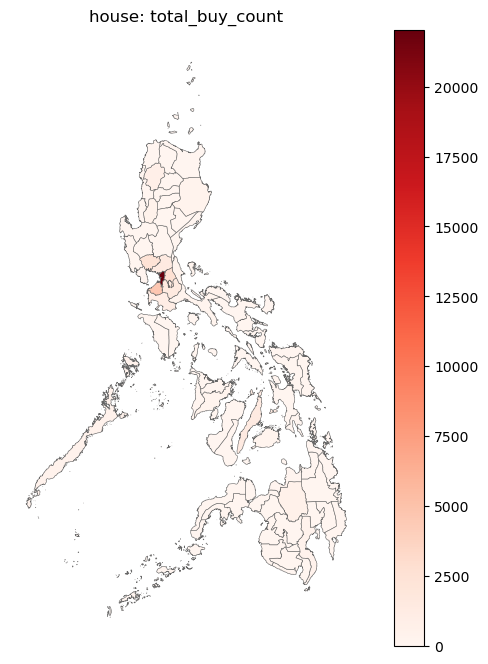

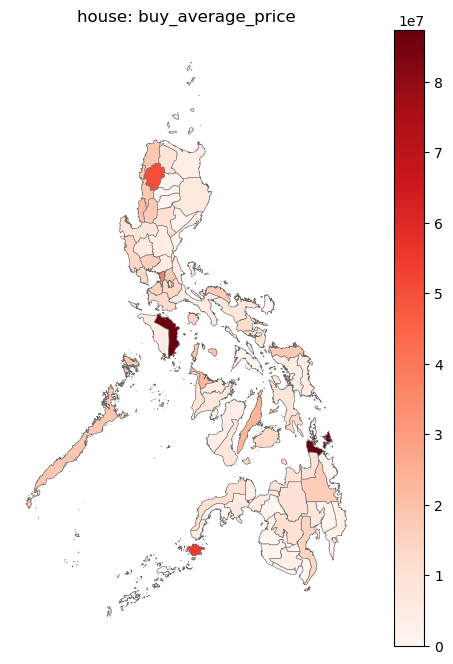

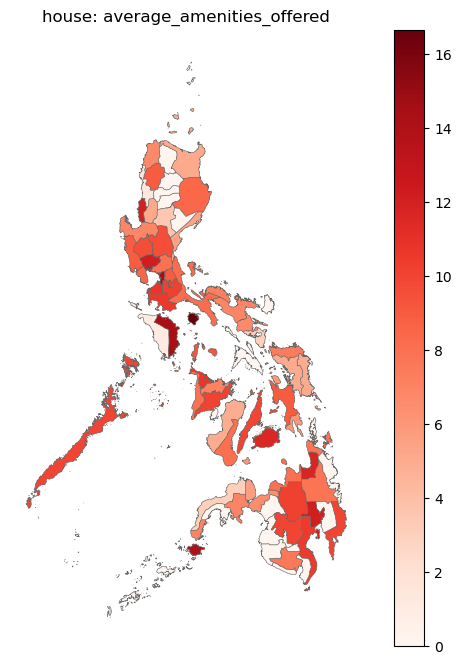

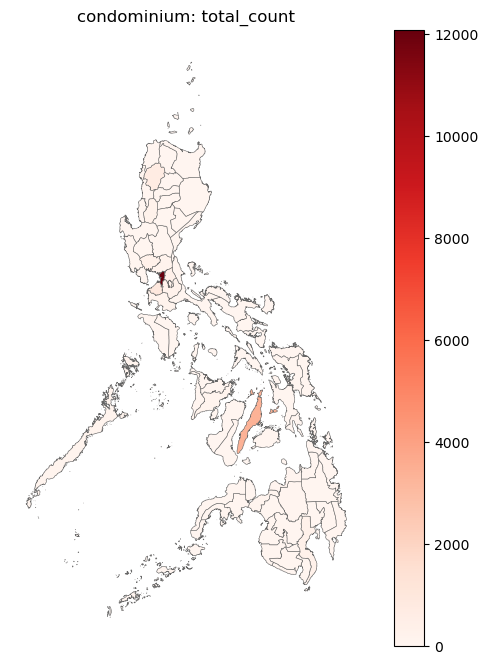

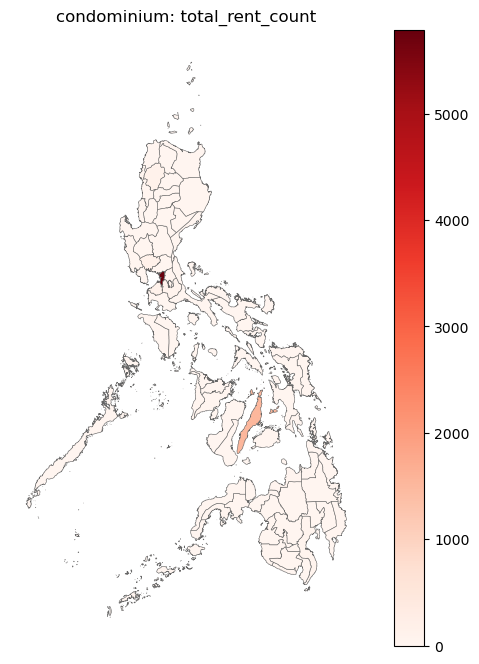

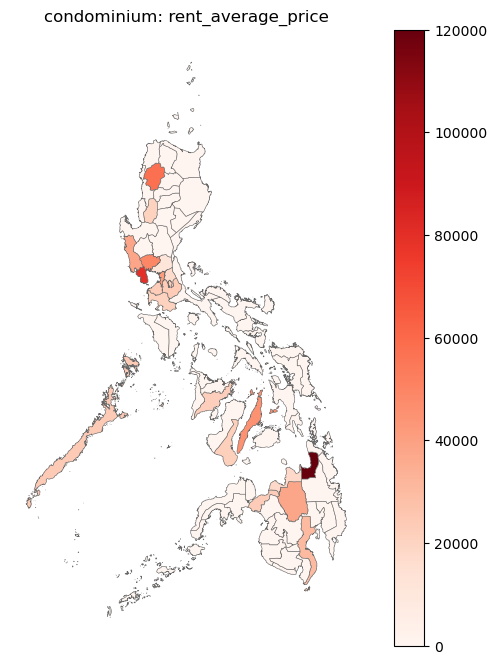

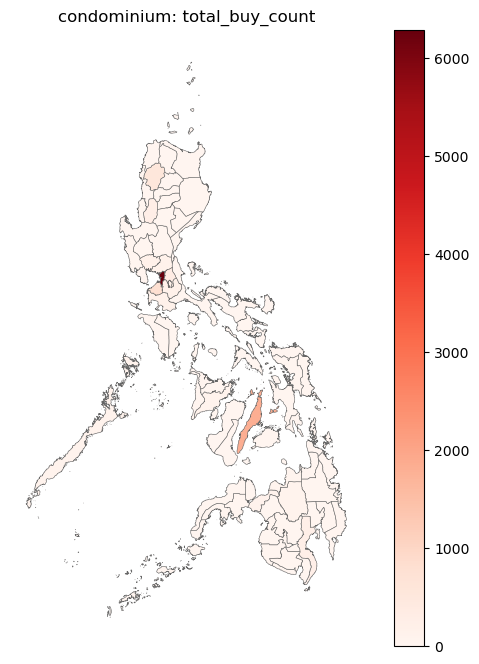

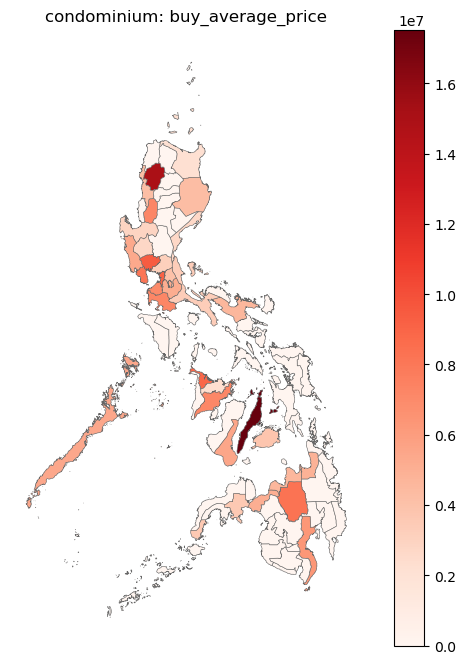

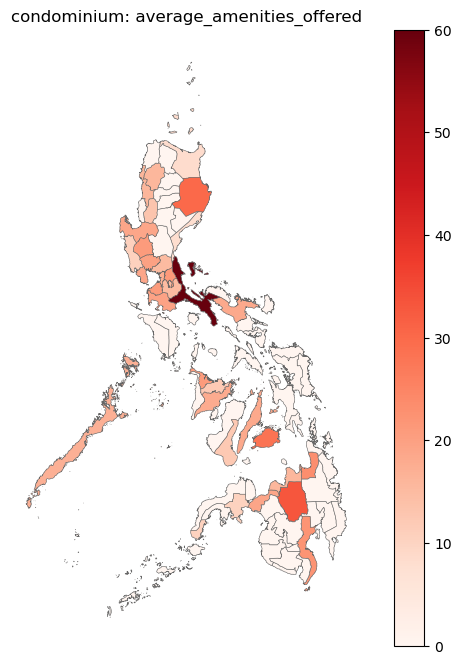

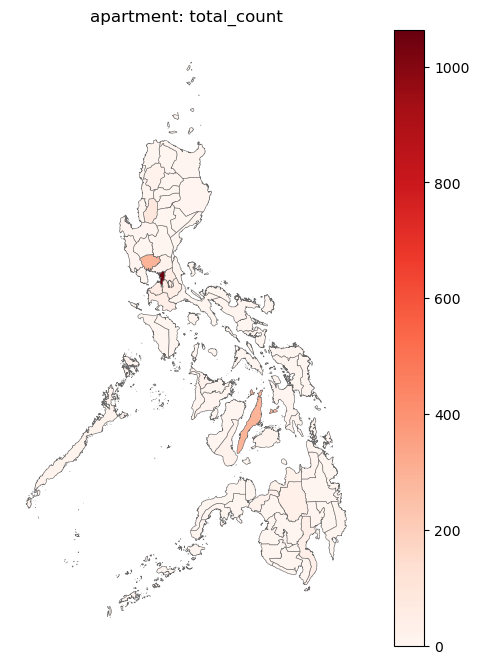

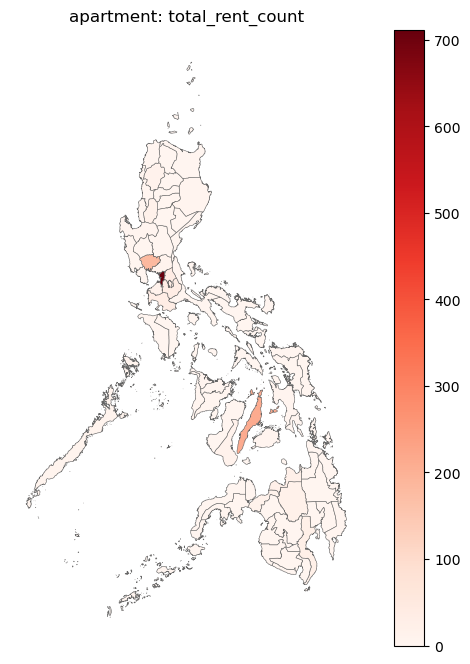

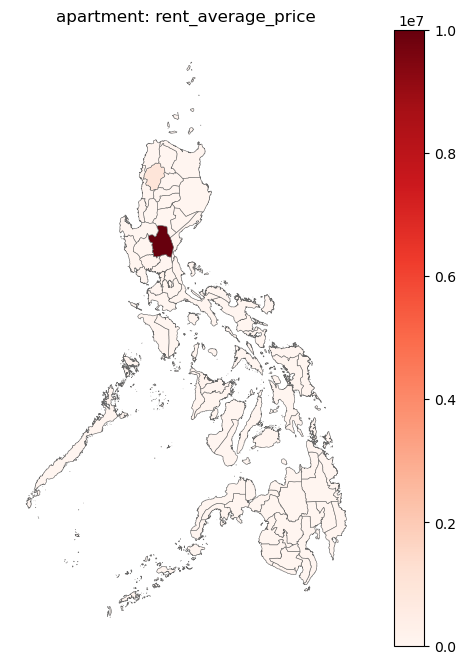

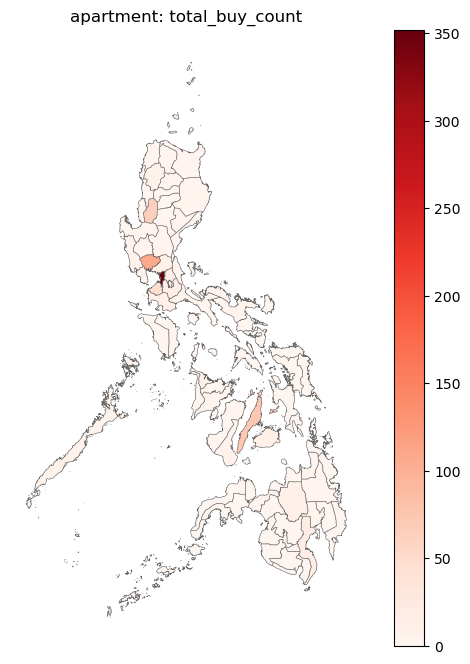

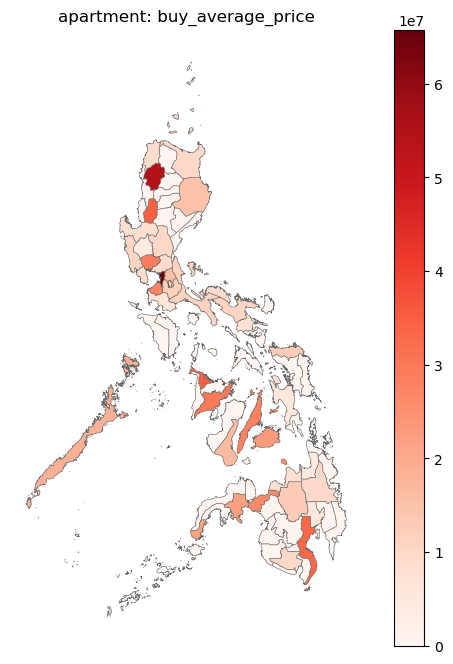

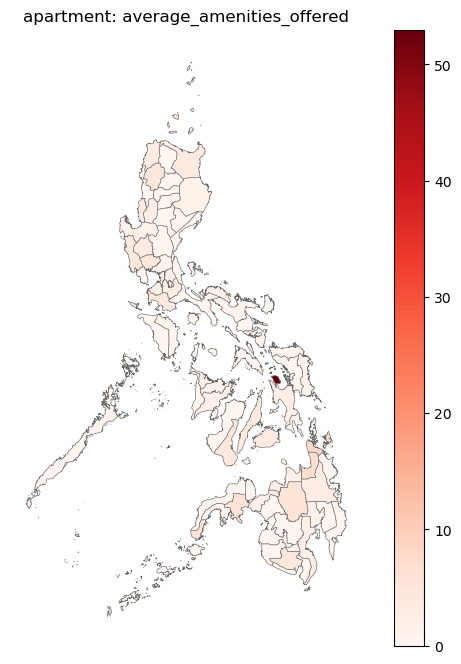

In [104]:
summarized = summarize_dataset(house_data)
create_images(summarized, "house")
del summarized

summarized = summarize_dataset(condo_data)
create_images(summarized, "condominium")
del summarized

summarized = summarize_dataset(apartment_data)
create_images(summarized, "apartment")
del summarized